<a href="https://colab.research.google.com/github/Ai-Albert/cse151a_project/blob/main/cse151a_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/Ai-Albert/cse151a_project

Cloning into 'cse151a_project'...
remote: Enumerating objects: 22, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 22 (delta 5), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (22/22), 1.38 MiB | 13.59 MiB/s, done.
Resolving deltas: 100% (5/5), done.


In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MultiLabelBinarizer

In [48]:
from string import printable
# Data preprocessing

def durationToInt(s):
  h = s.find('h')
  m = s.find('m')
  if h == -1:
    mins = int(s[:m])
    return mins
  if m == -1:
    hours = int(s[:h])
    return 60 * hours
  hours = int(s[:h])
  mins = int(s[h+1:m])
  return 60 * hours + mins

def boolToInt(b):
  if b:
    return 1
  return 0

def dropUncommonYears(data):
  rowsToDrop = []
  for i in range(len(data)):
    if data.loc[i, "Year"] != data.loc[i, "year_film"]:
      rowsToDrop.append(i)

  return data.drop(rowsToDrop)

def minMaxScale(data, column):
  mn = min(data[column])
  mx = max(data[column])
  return data[column].apply(lambda x: (x - mn) / (mx - mn))

oscar_data = pd.read_csv('/content/cse151a_project/the_oscar_award.csv')
imdb_data = pd.read_csv('/content/cse151a_project/imdb_movie_data_2023.csv')
imdb_data = imdb_data.rename(columns={"Moive Name":"Movie Name"})
imdb_data['Movie Name'] = imdb_data['Movie Name'].apply(lambda x: x.replace(' ', '', 1))

agg_data = pd.merge(imdb_data, oscar_data, left_on='Movie Name', right_on='film')
agg_data = dropUncommonYears(agg_data)
agg_data = agg_data.drop(['Unnamed: 0', 'film', 'year_film', 'year_ceremony', 'ceremony'], axis=1)
agg_data.Duration = agg_data.Duration.apply(durationToInt)
agg_data.winner = agg_data.winner.apply(boolToInt)
agg_data = agg_data.dropna()

# Source: https://stackoverflow.com/questions/45758646/pandas-convert-string-into-list-of-strings
agg_data['Genre'] = agg_data.Genre.apply(lambda x: x.split(", "))

# Source: https://stackoverflow.com/questions/45312377/how-to-one-hot-encode-from-a-pandas-column-containing-a-list

mlb = MultiLabelBinarizer()
agg_data = agg_data.join(pd.DataFrame(mlb.fit_transform(agg_data.pop("Genre")), columns = mlb.classes_, index=agg_data.index))


agg_data = pd.get_dummies(agg_data, columns=["PG Rating"])
agg_data = agg_data.rename(columns={"PG Rating_Approved": "Approved", "PG Rating_G": "G", "PG Rating_GP": "GP", "PG Rating_NC-17":"NC-17", "PG Rating_PG": "PG",
                                    "PG Rating_PG-13":"PG-13", "PG Rating_Passed":"Passed", "PG Rating_R":"R", "PG Rating_Unrated":"Unrated", "PG Rating_X":"X"})

agg_data["Rating"] = minMaxScale(agg_data, "Rating")
agg_data["Meta Score"] = minMaxScale(agg_data, "Meta Score")
agg_data

,Movie Name,Rating,Votes,Meta Score,Year,Duration,Cast,Director,category,name,...,Approved,G,GP,NC-17,PG,PG-13,Passed,R,Unrated,X
1,Die Hard,0.784314,924000.0,0.631579,1988,132,"Bruce Willis, Alan Rickman, Bonnie Bedelia, Re...",John McTiernan,FILM EDITING,"Frank J. Urioste, John F. Link",...,0,0,0,0,0,0,0,1,0,0
2,Die Hard,0.784314,924000.0,0.631579,1988,132,"Bruce Willis, Alan Rickman, Bonnie Bedelia, Re...",John McTiernan,SOUND,"Don Bassman, Kevin F. Cleary, Richard Overton,...",...,0,0,0,0,0,0,0,1,0,0
3,Die Hard,0.784314,924000.0,0.631579,1988,132,"Bruce Willis, Alan Rickman, Bonnie Bedelia, Re...",John McTiernan,SOUND EFFECTS EDITING,"Stephen H. Flick, Richard Shorr",...,0,0,0,0,0,0,0,1,0,0
4,Die Hard,0.784314,924000.0,0.631579,1988,132,"Bruce Willis, Alan Rickman, Bonnie Bedelia, Re...",John McTiernan,VISUAL EFFECTS,"Richard Edlund, Al DiSarro, Brent Boates, Thai...",...,0,0,0,0,0,0,0,1,0,0
5,The Polar Express,0.470588,233000.0,0.486842,2004,100,"Tom Hanks, Chris Coppola, Michael Jeter, Lesli...",Robert Zemeckis,MUSIC (Original Song),Music and Lyric by Glen Ballard and Alan Silve...,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2508,Doctor Zhivago,0.725490,81000.0,0.592105,1965,197,"Omar Sharif, Julie Christie, Geraldine Chaplin...",David Lean,MUSIC (Music Score--substantially original),Maurice Jarre,...,0,0,0,0,0,1,0,0,0,0
2509,Doctor Zhivago,0.725490,81000.0,0.592105,1965,197,"Omar Sharif, Julie Christie, Geraldine Chaplin...",David Lean,BEST PICTURE,"Carlo Ponti, Producer",...,0,0,0,0,0,1,0,0,0,0
2510,Doctor Zhivago,0.725490,81000.0,0.592105,1965,197,"Omar Sharif, Julie Christie, Geraldine Chaplin...",David Lean,SOUND,Metro-Goldwyn-Mayer British Studio Sound Depar...,...,0,0,0,0,0,1,0,0,0,0
2511,Doctor Zhivago,0.725490,81000.0,0.592105,1965,197,"Omar Sharif, Julie Christie, Geraldine Chaplin...",David Lean,WRITING (Screenplay--based on material from an...,Robert Bolt,...,0,0,0,0,0,1,0,0,0,0


In [4]:
agg_data.dtypes

Movie Name     object
Rating        float64
Votes         float64
Meta Score    float64
Genre          object
PG Rating      object
Year            int64
Duration        int64
Cast           object
Director       object
category       object
name           object
winner          int64
dtype: object

In [5]:
def getUniqueList(Category):
  categories = agg_data[Category]
  categories_list = np.array([])
  for i in range(len(categories)):
    currCategory = str(categories[i])
    if currCategory != "nan":
      currList = currCategory.split(", ")
      categories_list = np.append(categories_list, currList)
  return np.unique(categories_list)

In [6]:
unique_genres = len(getUniqueList('Genre'))
unique_cast = len(getUniqueList('Cast'))
unique_movies = len(agg_data["Movie Name"].unique())
pg_ratings = len(agg_data["PG Rating"].unique())
unique_directors = len(agg_data["Director"].unique())
unique_categories = len(agg_data["category"].unique())
unique_names = len(getUniqueList("name"))

In [7]:
# Find range of numerical variables, finding number of unique entries for each categorical variable
print(f"Movie Name - # unique values: {unique_movies}")
print(f"Rating - range of values: [{agg_data.Rating.min()}, {agg_data.Rating.max()}]")
print(f"Votes - range of values: [{agg_data.Votes.min()}, {agg_data.Votes.max()}]")
print(f"Meta Score - range of values: [{agg_data['Meta Score'].min()}, {agg_data['Meta Score'].max()}]")
print(f"Genre - # unique values: {unique_genres}")
print(f"PG Rating - # unique values: {pg_ratings}")
print(f"Year - range of values: [{agg_data.Year.min()}, {agg_data.Year.max()}]")
print(f"Duration - # unique values: [{agg_data.Duration.min()}, {agg_data.Duration.max()}]") # TODO
print(f"Cast - # unique values: {unique_cast}")
print(f"Director - # unique values: {unique_directors}")
print(f"category - # unique values: {unique_categories}")
print(f"name - # unique values: {unique_names}")

Movie Name - # unique values: 615
Rating - range of values: [4.2, 9.3]
Votes - range of values: [378.0, 2800000.0]
Meta Score - range of values: [23.0, 100.0]
Genre - # unique values: 21
PG Rating - # unique values: 14
Year - range of values: [1938, 2023]
Duration - # unique values: [69, 238]
Cast - # unique values: 1442
Director - # unique values: 354
category - # unique values: 82
name - # unique values: 2446


In [8]:
# How much missing data is in each column
TF_df_for_null = agg_data.isnull()
TF_df_for_null = TF_df_for_null.sum()
for i in range(len(agg_data.columns)):
  print(agg_data.columns[i] + " - # missing values: " + str(TF_df_for_null[i]))

Movie Name - # missing values: 0
Rating - # missing values: 11
Votes - # missing values: 11
Meta Score - # missing values: 24
Genre - # missing values: 24
PG Rating - # missing values: 6
Year - # missing values: 0
Duration - # missing values: 0
Cast - # missing values: 24
Director - # missing values: 24
category - # missing values: 0
name - # missing values: 0
winner - # missing values: 0


In [9]:
# column descriptions
print("Movie Name: (object) the names of the movies")
print("Rating: (float64) the IMDB ratings given by users")
print("Votes: (float64) IMDb registered users' vote (from 1 to 10)")
print("Meta Score: (float64) weighted average of reviews from top critics and publications for a given movie")
print("Genre: (object) Genre of the movie")
print("PG Rating: (object) Parental guidance suggested")
print("Year: (int64) Year the movie was released")
print("Duration: (int64) Runtime of the movie in minutes")
print("Cast: (object) lead actors and actress")
print("Director: (object) director of the movie")
print("Category: (object) The nomination category")
print("name: (object) Name of nomination")
print("winner: (int64) 1/0 depending on whether or not the movie won")

# votes info: https://help.imdb.com/article/imdb/track-movies-tv/ratings-faq/G67Y87TFYYP6TWAV#
# meta score info: https://www.databoosting.com/imdb-vs-metacritic-which-is-more-trustworthy#/
# copied some descriptions from https://www.kaggle.com/datasets/unanimad/the-oscar-award

Movie Name: (object) the names of the movies
Rating: (float64) the IMDB ratings given by users
Votes: (float64) IMDb registered users' vote (from 1 to 10)
Meta Score: (float64) weighted average of reviews from top critics and publications for a given movie
Genre: (object) Genre of the movie
PG Rating: (object) Parental guidance suggested
Year: (int64) Year the movie was released
Duration: (int64) Runtime of the movie in minutes
Cast: (object) lead actors and actress
Director: (object) director of the movie
Category: (object) The nomination category
name: (object) Name of nomination
winner: (int64) 1/0 depending on whether or not the movie won


## Plotting

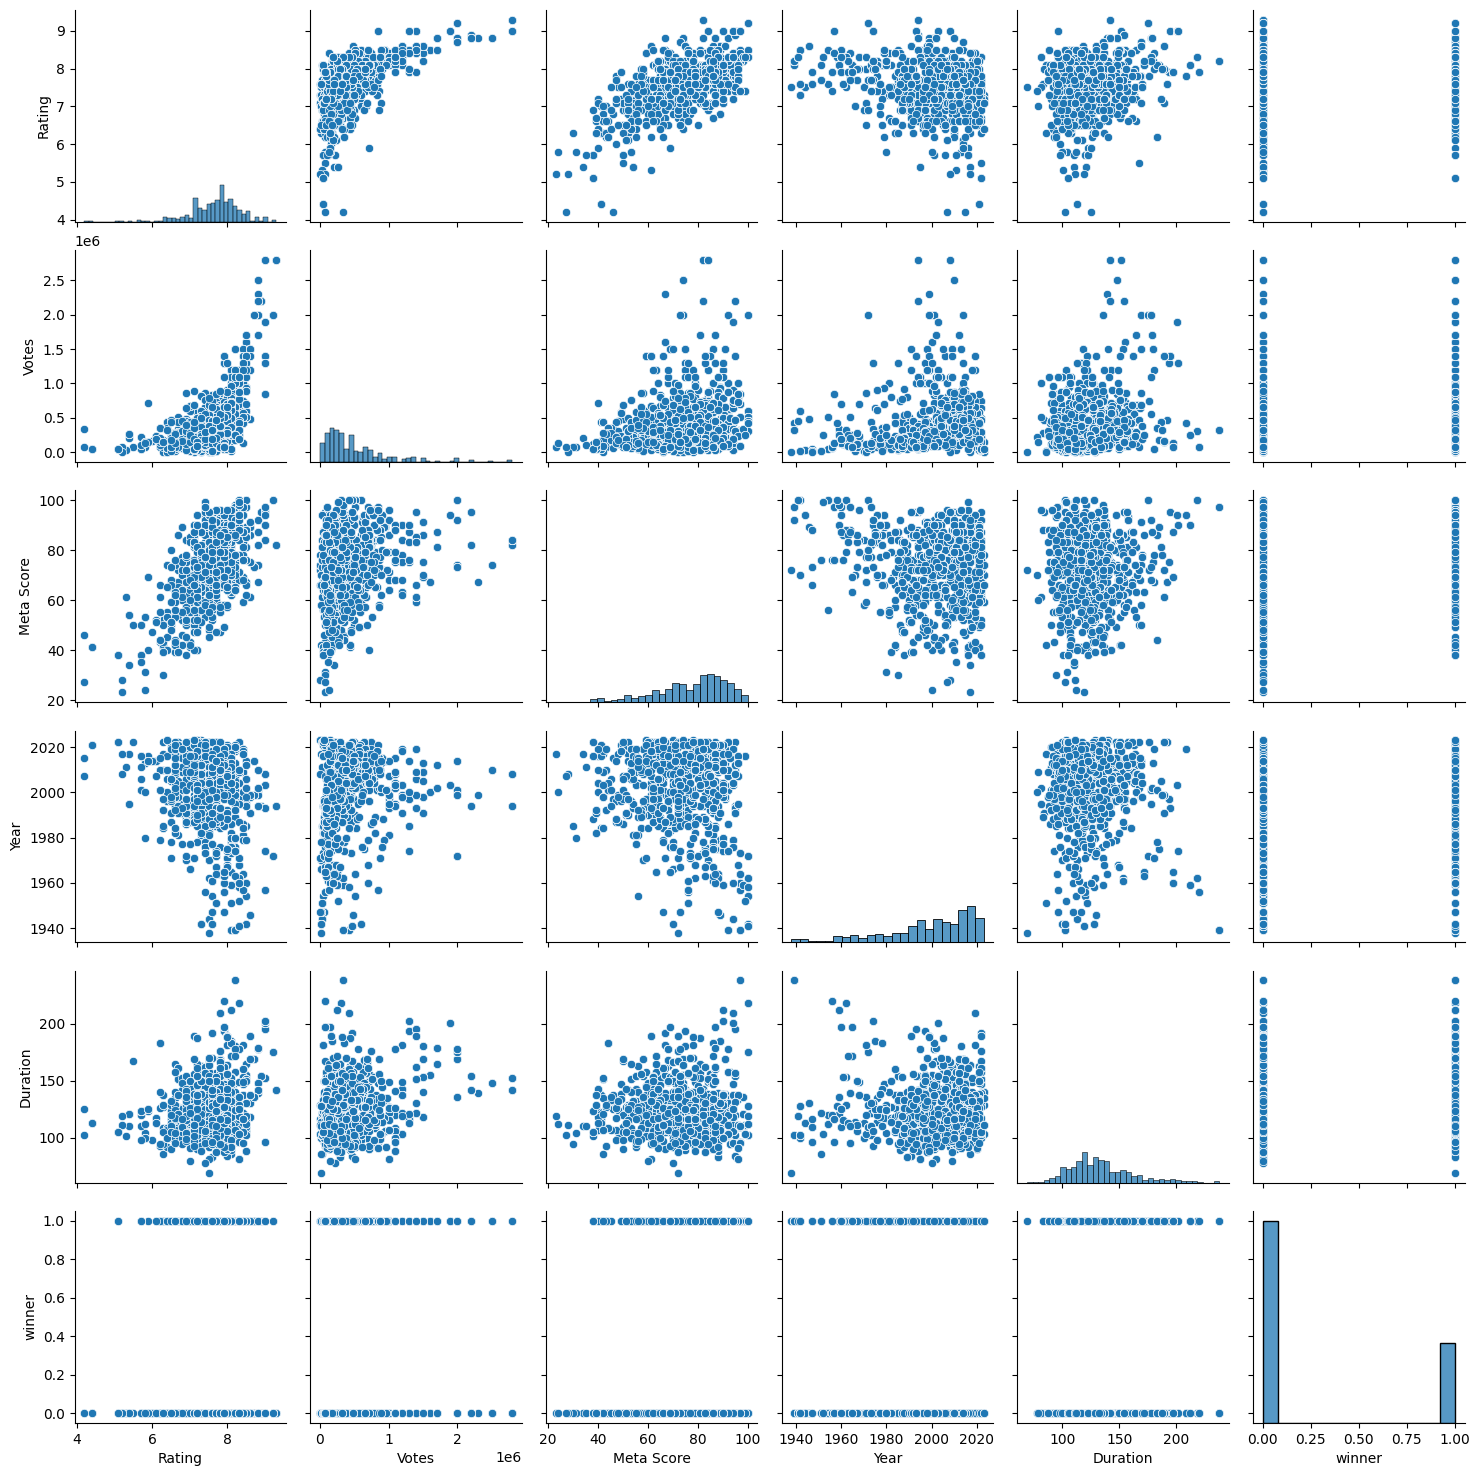

In [10]:
sns.pairplot(agg_data)

from above,
- winner takes about 30% of all movies in Oscar nominations.

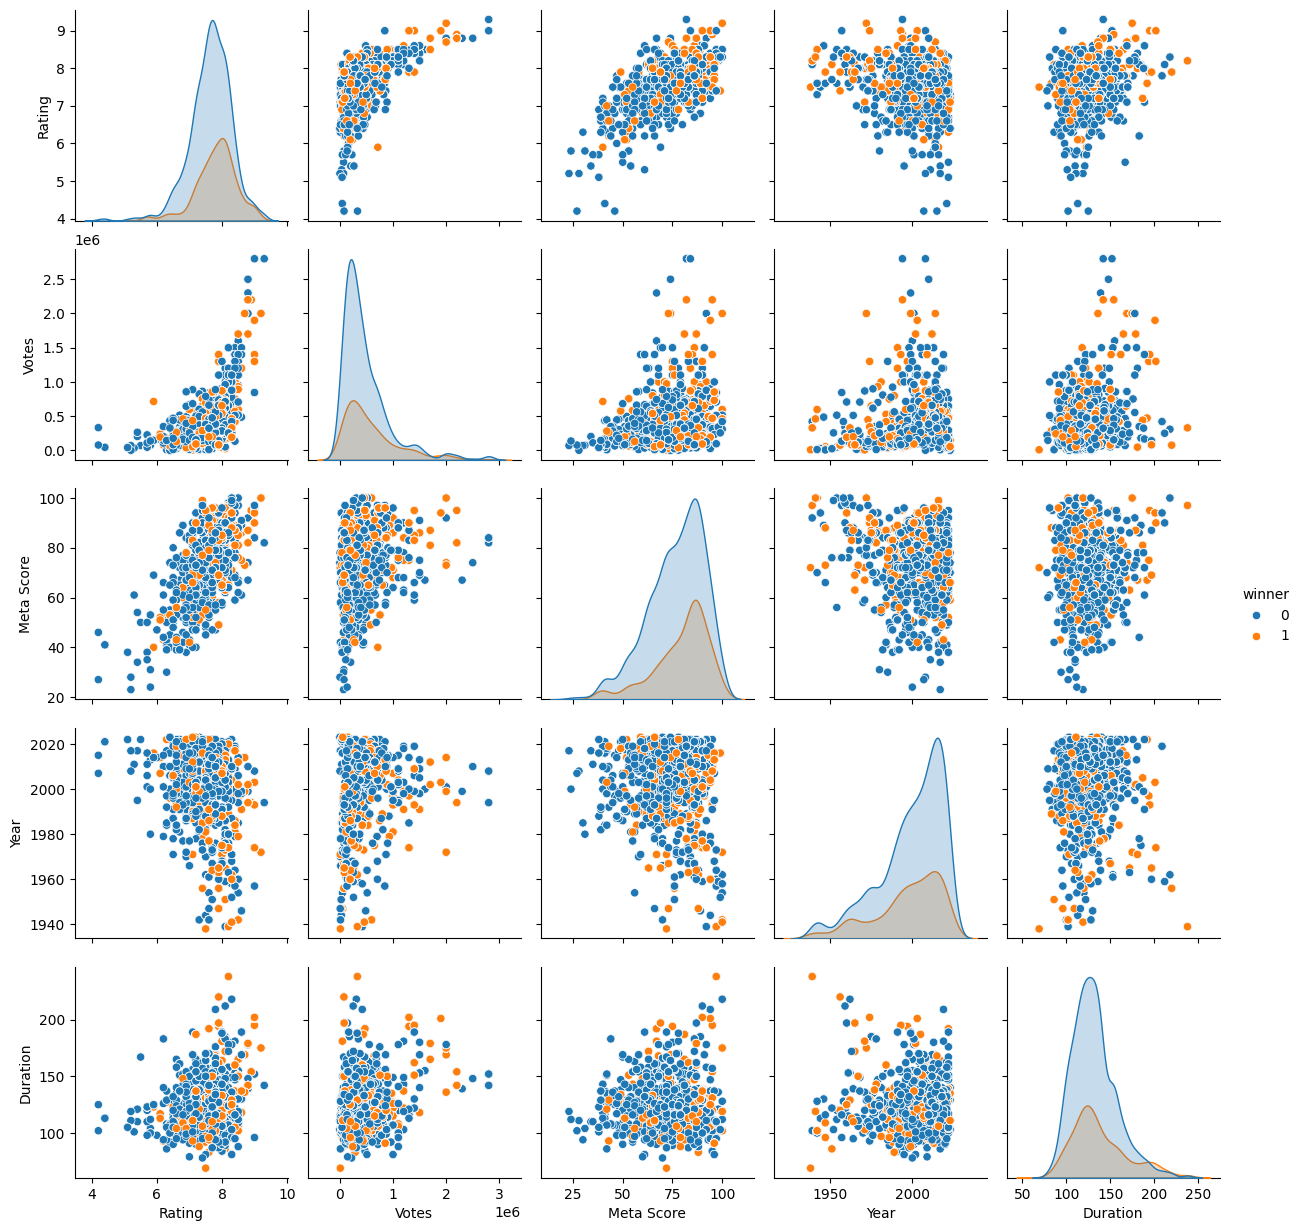

In [11]:
sns.pairplot(agg_data, hue = 'winner')

From above,
- from Rating vs. Rating(Distrbution of Rating), Oscar winners has a higher mean values of rating than loser does.
- the pure amount of winners of Oscar increases from 1940s to 2020s.
- overall, we see no strong correlation between these atrributes and winners results.

<Axes: >

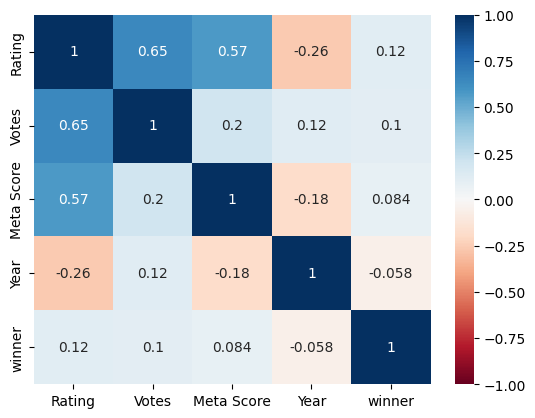

In [12]:
agg_num = agg_data.drop(columns=['Movie Name','Genre','PG Rating','Duration','Cast','Director','category','name'])
sns.heatmap(agg_num.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap = 'RdBu')

From above we can see among those quantitative variables in the dataset, there are weak correlations between winner results and them. Here we can imply that it is not a good way to only use linaer regression(consider one indepdent variable) to predict the result, applying polynomial regression or consider other categorical variables might works better.

All the attributes we mentioned in visualization are numerical, we didn't put categorical varibales into considerations here. So we might wanna put more effort on exploring the relationship between categorical avriables and winner reuslt in our further analysis.

In [13]:
agg_data

,Movie Name,Rating,Votes,Meta Score,Genre,PG Rating,Year,Duration,Cast,Director,category,name,winner
0,Maestro,7.3,3600.0,78.0,"Biography, Drama, Music",R,2023,129,"Carey Mulligan, Bradley Cooper, Matt Bomer, Vi...",Bradley Cooper,SHORT FILM (Animated),Géza M. Tóth,0
1,Die Hard,8.2,924000.0,72.0,"Action, Thriller",R,1988,132,"Bruce Willis, Alan Rickman, Bonnie Bedelia, Re...",John McTiernan,FILM EDITING,"Frank J. Urioste, John F. Link",0
2,Die Hard,8.2,924000.0,72.0,"Action, Thriller",R,1988,132,"Bruce Willis, Alan Rickman, Bonnie Bedelia, Re...",John McTiernan,SOUND,"Don Bassman, Kevin F. Cleary, Richard Overton,...",0
3,Die Hard,8.2,924000.0,72.0,"Action, Thriller",R,1988,132,"Bruce Willis, Alan Rickman, Bonnie Bedelia, Re...",John McTiernan,SOUND EFFECTS EDITING,"Stephen H. Flick, Richard Shorr",0
4,Die Hard,8.2,924000.0,72.0,"Action, Thriller",R,1988,132,"Bruce Willis, Alan Rickman, Bonnie Bedelia, Re...",John McTiernan,VISUAL EFFECTS,"Richard Edlund, Al DiSarro, Brent Boates, Thai...",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2509,Doctor Zhivago,7.9,81000.0,69.0,"Drama, Romance, War",PG-13,1965,197,"Omar Sharif, Julie Christie, Geraldine Chaplin...",David Lean,BEST PICTURE,"Carlo Ponti, Producer",0
2510,Doctor Zhivago,7.9,81000.0,69.0,"Drama, Romance, War",PG-13,1965,197,"Omar Sharif, Julie Christie, Geraldine Chaplin...",David Lean,SOUND,Metro-Goldwyn-Mayer British Studio Sound Depar...,0
2511,Doctor Zhivago,7.9,81000.0,69.0,"Drama, Romance, War",PG-13,1965,197,"Omar Sharif, Julie Christie, Geraldine Chaplin...",David Lean,WRITING (Screenplay--based on material from an...,Robert Bolt,1
2512,The Fly,7.6,198000.0,79.0,"Drama, Horror, Sci-Fi",R,1986,96,"Jeff Goldblum, Geena Davis, John Getz, Joy Bou...",David Cronenberg,SHORT FILM (Animated),"Ferenc Rofusz, Producer",1
